# Feature Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
warnings.filterwarnings(action="ignore")

In [3]:
df = pd.read_csv("../../CSV/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
cat_col = ["sex","children","smoker","region"]

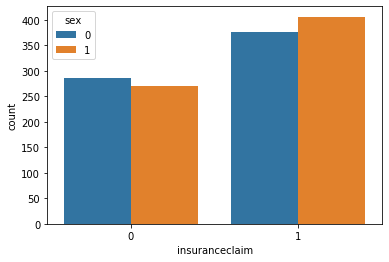

------------------------------------------


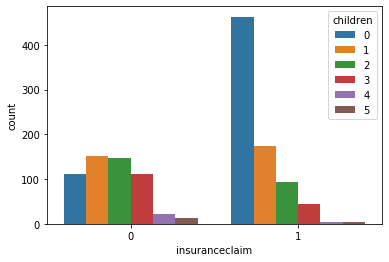

------------------------------------------


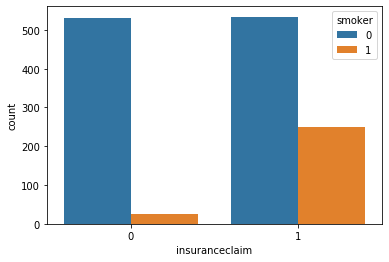

------------------------------------------


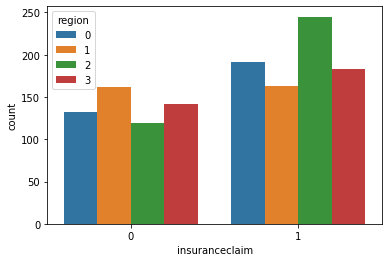

------------------------------------------


In [6]:
for col in cat_col:
    plt.figure()
    sns.countplot(data=df,x="insuranceclaim", hue=col)
    plt.show()
    print("------------------------------------------")

<p> Smoker and Children columns might affect the target </p>

In [7]:
num_col = ["age","bmi","charges"]

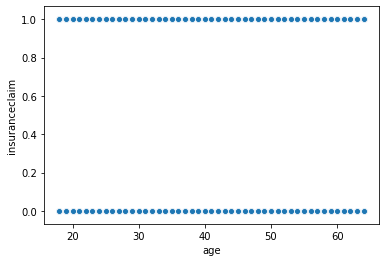

-------------------------------------------


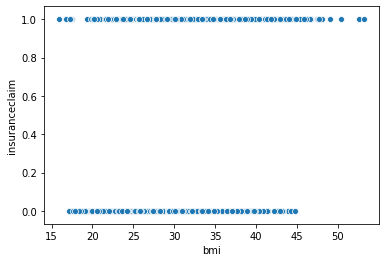

-------------------------------------------


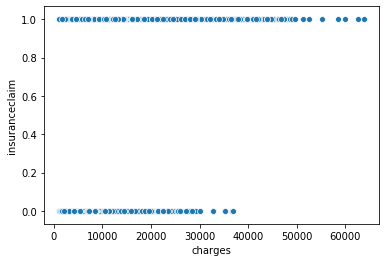

-------------------------------------------


In [8]:
for col in num_col:
    plt.figure()
    sns.scatterplot(data=df, x=col, y="insuranceclaim")
    plt.show()
    print("-------------------------------------------")

<p>charges and bmi might affect the target</p>

## Baseline model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score

In [23]:
def train_model(X_train,X_test):
    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(classification_report(y_test,y_pred))

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
train_model(X_train,X_test)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

    accuracy                           0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402



## Filter method

In [14]:
#chi2
from sklearn.feature_selection import chi2
# ANOVA
from sklearn.feature_selection import f_regression
# common function for both
from sklearn.feature_selection import SelectKBest

In [15]:
# chi2 test

In [16]:
chi2 = SelectKBest(score_func=chi2,k=5)

In [17]:
X_train_chi = chi2.fit_transform(X_train,y_train)

In [18]:
X_test_chi = chi2.transform(X_test)

In [19]:
train_model(X_train_chi,X_test_chi)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       157
           1       0.81      0.87      0.84       245

    accuracy                           0.80       402
   macro avg       0.79      0.78      0.78       402
weighted avg       0.80      0.80      0.80       402



In [20]:
chi2.scores_

array([6.66570510e+01, 7.99951711e-01, 1.76723951e+02, 2.24760407e+02,
       8.97512391e+01, 1.90474694e+00, 1.05483865e+06])

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [22]:
chi2.get_support()

array([ True, False,  True,  True,  True, False,  True])

In [23]:
# Anova

In [24]:
anova = SelectKBest(score_func=f_regression,k=4)

In [25]:
X_train_f = anova.fit_transform(X_train,y_train)
X_test_f = anova.transform(X_test)

In [26]:
train_model(X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       157
           1       0.79      0.88      0.83       245

    accuracy                           0.78       402
   macro avg       0.78      0.75      0.76       402
weighted avg       0.78      0.78      0.78       402



In [27]:
anova.scores_

array([ 13.32163892,   1.63777909, 173.24700069, 201.75424875,
       128.32425002,   2.35830459, 104.5606801 ])

In [28]:
anova.get_support()

array([False, False,  True,  True,  True, False,  True])

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

## Wrapper methods

In [30]:
features = df.columns.tolist()[:-1]

In [31]:
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [34]:
cols = []

In [35]:
for col in features:
    cols.append(col)
  
    X = df[cols]
    y = df["insuranceclaim"]
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    

    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(col,"----> precision: ",precision_score(y_test,y_pred),"recall: ",recall_score(y_test,y_pred))

age ----> precision:  0.5965909090909091 recall:  0.8571428571428571
sex ----> precision:  0.5955678670360111 recall:  0.8775510204081632
bmi ----> precision:  0.7290076335877863 recall:  0.7795918367346939
children ----> precision:  0.80078125 recall:  0.8367346938775511
smoker ----> precision:  0.9020408163265307 recall:  0.9020408163265307
region ----> precision:  0.9020408163265307 recall:  0.9020408163265307
charges ----> precision:  0.8192307692307692 recall:  0.8693877551020408


## Principal component analysis

In [27]:
from sklearn.decomposition import PCA

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
pca = PCA(n_components=5,random_state=1)

In [30]:
X_train_pca = pca.fit_transform(X_train)

In [31]:
X_test_pca = pca.transform(X_test)

In [32]:
train_model(X_train_pca,X_test_pca)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       157
           1       0.89      0.90      0.89       245

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



In [69]:
components = pca.components_

In [71]:
components[0]

array([ 3.47149728e-04,  2.02993643e-06,  9.76283845e-05,  3.28579817e-06,
        2.64211095e-05, -3.42637708e-07,  9.99999935e-01])

In [72]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [73]:
components[1]

array([-9.99306837e-01,  3.96547954e-04, -3.63219499e-02, -6.54221995e-04,
        7.98074855e-03, -1.46982768e-03,  3.50245154e-04])

In [74]:
# web service
# flask

In [75]:
# porting you code

In [76]:
# pip install sklearn-porter

In [77]:
# https://github.com/nok/sklearn-porter

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier()

In [81]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
from sklearn_porter import Porter


In [89]:
porter = Porter(dt, language='php')
output = porter.export(embed_data=True)

In [90]:
print(output)

<?php

class DecisionTreeClassifier {

    public static function predict($atts) {
        if (sizeof($atts) != 7) { return -1; }
    
        $classes = array_fill(0, 2, 0);
            
        if ($features[2] <= 25.982500076293945) {
            if ($features[4] <= 0.5) {
                if ($features[2] <= 17.639999389648438) {
                    $classes[0] = 0; 
                    $classes[1] = 5; 
                } else {
                    if ($features[2] <= 25.332499504089355) {
                        $classes[0] = 144; 
                        $classes[1] = 0; 
                    } else {
                        if ($features[3] <= 1.5) {
                            $classes[0] = 21; 
                            $classes[1] = 0; 
                        } else {
                            if ($features[6] <= 7467.06201171875) {
                                $classes[0] = 2; 
                                $classes[1] = 0; 
                            } else {
     